# Summation of Primes
The sum of the primes below 10 is 2 + 3 + 5 + 7 = 17.

Find the sum of all the primes below two million.


## Solution One - Brute Force
The simplest way to generate the primes we need is by brute force, that is dividing every number bellow two million by every number bellow that number.

In [13]:
from utils.timing import timed


@timed(1)
def solution_one(upper_bound: int = 20000000) -> int:
    """
    finds the sum of every prime bellow the provided limit

    :param upper_bound: upper bound for primes
    """
    answer: int = 0

    for prime in range(2, upper_bound):
        is_prime: bool = True

        for divisor in range(2, prime):
            
            if not prime % divisor:
                is_prime = False
                break

        if is_prime:
            answer += prime

    return answer

answer, time = solution_one(20000)
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 21171191
that took: 0.7743223960005707s


### Solution One Discussion
Solution one is extremely slow, because of the two nested loops: in the worst case we have to do $n^2$ divisions. However, solution one is very efficient in terms of memory, only having to store a cuple variables.

## Solution Two - Brute Force With Domain Restrictions
Solution One's main flaw is having to check up to $n - 1$ possible divisors to verify if $n$ is prime. Therefore, one quick way to improve its performance would be to limit the number of divisors checked. To achieve that, instead of checking every number up to $n - 1$, we just need to check every number up to $\sqrt{n}$. Moreover, we can use a generator to skip over all even numbers except 2 further improving the performance.

In [14]:
from math import floor, sqrt
from typing import Iterator
from utils.timing import timed


def possible_primes(upper_bound: int) -> Iterator[int]:
    """
    Generates possible primes up to the limit provided

    :param upper_bound: limit for generating possible primes
    """
    number: int = 2

    while number < upper_bound:
        yield number

        if number == 2:
            number += 1

        else:
            number += 2


@timed(1)
def solution_two(upper_bound: int = 20000000) -> int:
    """
    finds the sum of every prime bellow the provided limit

    :param upper_bound: upper bound for primes
    """
    answer: int = 0

    for prime in possible_primes(upper_bound):
        is_prime: bool = True

        for divisor in possible_primes(floor(sqrt(prime)) + 1):
            
            if not prime % divisor:
                is_prime = False
                break

        if is_prime:
            answer += prime

    return answer


answer, time = solution_two(20000)
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 21171191
that took: 0.021003103000111878s


## Plots

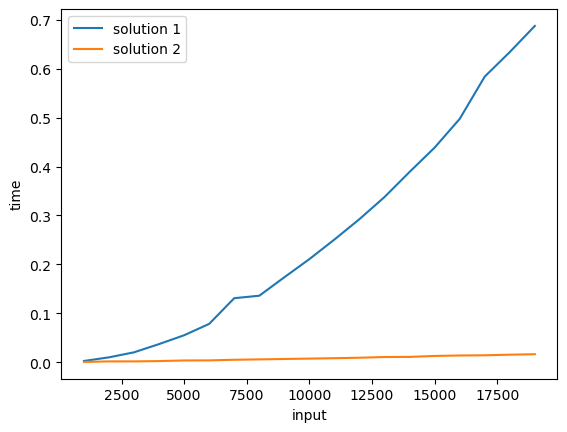

In [15]:
from utils.plotting import plot_range

params = tuple((i, ) for i in range(1000, 20000, 1000))
plot_range(params, (solution_one, solution_two))